In [1]:
# Run this if you run on google colab
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading library and Reading data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
from pathlib import Path
import glob
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

In [9]:
# Change this to where you pt your file
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Udacity/DS_Prj_01/Data/survey_results_public.csv')
df = pd.read_csv('./Data/survey_results_public.csv')
df.describe()

,ResponseId,CompTotal,VCHostingPersonal use,VCHostingProfessional use,WorkExp,ConvertedCompYearly
count,73268.000000,3.842200e+04,0.0,0.0,36769.000000,3.807100e+04
mean,36634.500000,2.342434e+52,NaN,NaN,10.242378,1.707613e+05
std,21150.794099,4.591478e+54,NaN,NaN,8.706850,7.814132e+05
min,1.000000,0.000000e+00,NaN,NaN,0.000000,1.000000e+00
25%,18317.750000,3.000000e+04,NaN,NaN,4.000000,3.583200e+04
50%,36634.500000,7.750000e+04,NaN,NaN,8.000000,6.784500e+04
75%,54951.250000,1.540000e+05,NaN,NaN,15.000000,1.200000e+05
max,73268.000000,9.000000e+56,NaN,NaN,50.000000,5.000000e+07


In [10]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [11]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


## Developer profile
- We're using the group of 'EdLevel' (Education Level).
- We count the number for each value in 'EdLevel'.
- Then we plot the value counts.

In [12]:
EdLevel = df.EdLevel
EdLevel

0                                                    NaN
1                                                    NaN
2        Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
3           Bachelor’s degree (B.A., B.S., B.Eng., etc.)
4           Bachelor’s degree (B.A., B.S., B.Eng., etc.)
                              ...                       
73263       Bachelor’s degree (B.A., B.S., B.Eng., etc.)
73264    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
73265       Bachelor’s degree (B.A., B.S., B.Eng., etc.)
73266       Bachelor’s degree (B.A., B.S., B.Eng., etc.)
73267       Bachelor’s degree (B.A., B.S., B.Eng., etc.)
Name: EdLevel, Length: 73268, dtype: object

<BarContainer object of 9 artists>

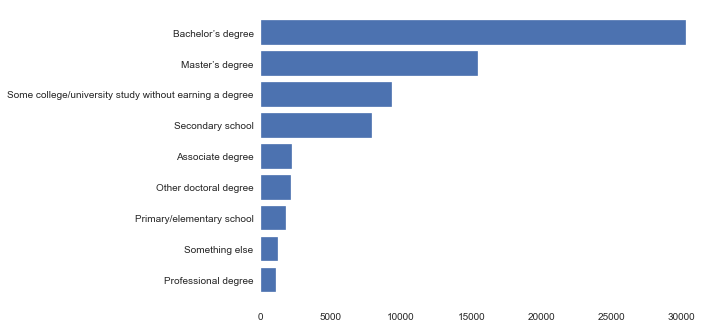

In [13]:
EdLevel = EdLevel.value_counts().sort_values(ascending=True, axis=0)
plt.barh(EdLevel.index.map(lambda x: x.split(' (')[0]), width=EdLevel)

## Work after covid
- We're using the group of 'RemoteWork'.
- We count the number for each value in 'RemoteWork'.
- Then we plot the value counts.

In [14]:
RemoteWork = df.RemoteWork
RemoteWork

0                                         NaN
1                                Fully remote
2        Hybrid (some remote, some in-person)
3                                Fully remote
4        Hybrid (some remote, some in-person)
                         ...                 
73263                            Fully remote
73264                          Full in-person
73265    Hybrid (some remote, some in-person)
73266    Hybrid (some remote, some in-person)
73267                            Fully remote
Name: RemoteWork, Length: 73268, dtype: object

<BarContainer object of 3 artists>

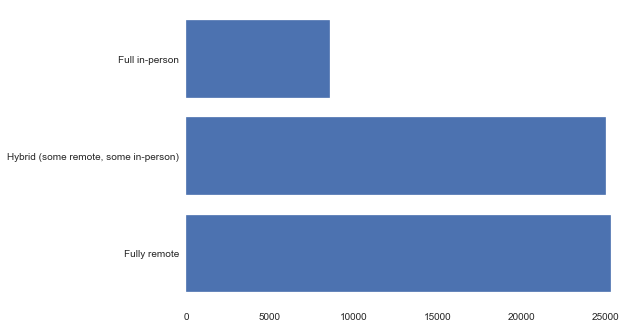

In [15]:
RemoteWork = df.RemoteWork.value_counts()
plt.barh(RemoteWork.index, width=RemoteWork)

- The percentage of none working full in-person (include Hybrid and Fully remote)

In [16]:
(RemoteWork[0] + RemoteWork[1]) / RemoteWork.sum()

0.854201295837715

- We're using the group of 'Employment'. We can drop the nan value because in this case we cannot have a meaningful replace data for and it doesn't impact to much to the result.
- We count the number for each value in 'Employment'.
- Then we plot the value counts.

In [18]:
Employment = df.Employment
Employment.unique()

array([nan, 'Employed, full-time', 'Student, full-time',
       'Student, part-time', 'Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Employed, part-time', 'Student, part-time;Employed, part-time',
       'Not employed, and not looking for work',
       'Student, full-time;Employed, part-time',
       'Employed, full-time;Student, part-time',
       'Employed, full-time;Student, full-time',
       'Student, part-time;Independent contractor, freelancer, or self-employed',
       'Retired', 'Student, full-time;Not employed, but looking for work',
       'I prefer not to say',
       'Student, full-time;Independent contractor, freelancer, or self-employed',
       'Student, full-time;Not employed, and not looking for work',
       'Not employed, but looking for work;Independent contractor, freelancer, or self-employed',
       'Employed, full-time

- We can see that the data is repeated in the response. Each response can have multi-meaningful-values.
- We need to count each value in each response in all data. So we define a function data could do it.

In [19]:
def get_value_counts_distinct(lst):
  """
  Get deeper value counts in lst

  A record in lst that contains many value that separate by ';'
  this function will separate and return the value counts for each
  value in the record.

  Parameters:
  lst (list<str>): list of values or value-concat by ';'

  Returns:
  Dataframe of each value counts.
  """
  rs = {}
  for each in lst:
    lst_e = each.split(';')
    for e in lst_e:
      if e in rs:
        rs[e] = rs[e] + 1
      else:
        rs[e] = 1
  return pd.DataFrame(rs.items(), columns=['value', 'count'])

<BarContainer object of 9 artists>

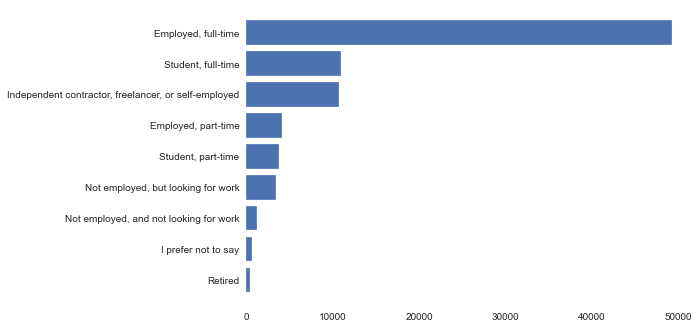

In [21]:
Employment = Employment.dropna(axis=0)
Employment_value_counts = get_value_counts_distinct(Employment).sort_values(axis=0, by='count', ascending=True)
plt.barh(Employment_value_counts.iloc[:,0], width=Employment_value_counts.iloc[:,1])

This also like above but for the 'DevType' and 'MainBrach'

<BarContainer object of 29 artists>

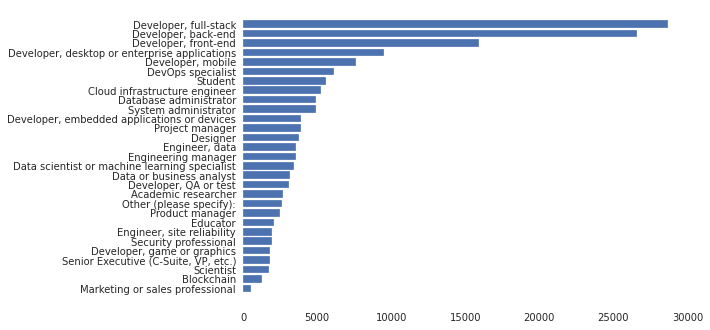

In [15]:
DevType = df.DevType.dropna(axis=0)
DevType_value_counts = get_value_counts_distinct(DevType).sort_values(axis=0, by='count', ascending=True)
plt.barh(DevType_value_counts.iloc[:,0], width=DevType_value_counts.iloc[:,1])

<BarContainer object of 6 artists>

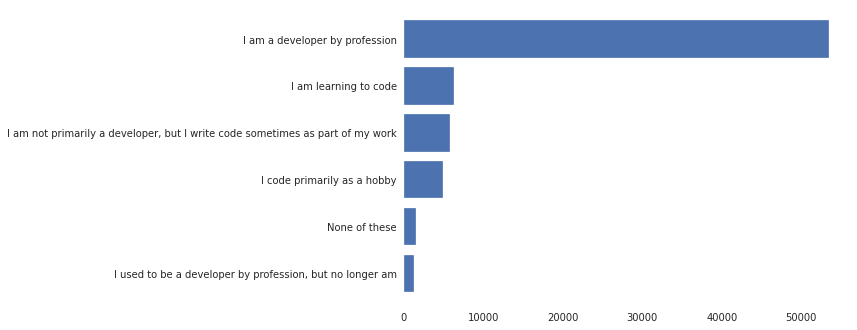

In [16]:
MainBranch = df.MainBranch.dropna(axis=0)
MainBranch_value_counts = get_value_counts_distinct(MainBranch).sort_values(axis=0, by='count', ascending=True)
plt.barh(MainBranch_value_counts.iloc[:,0], width=MainBranch_value_counts.iloc[:,1])

### The relevant between 'DevType' and 'MainBrach'
- We use the Chi-Square to modeling the data.
- Plot the Chi-Square table to visualize the relevant in the data.

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

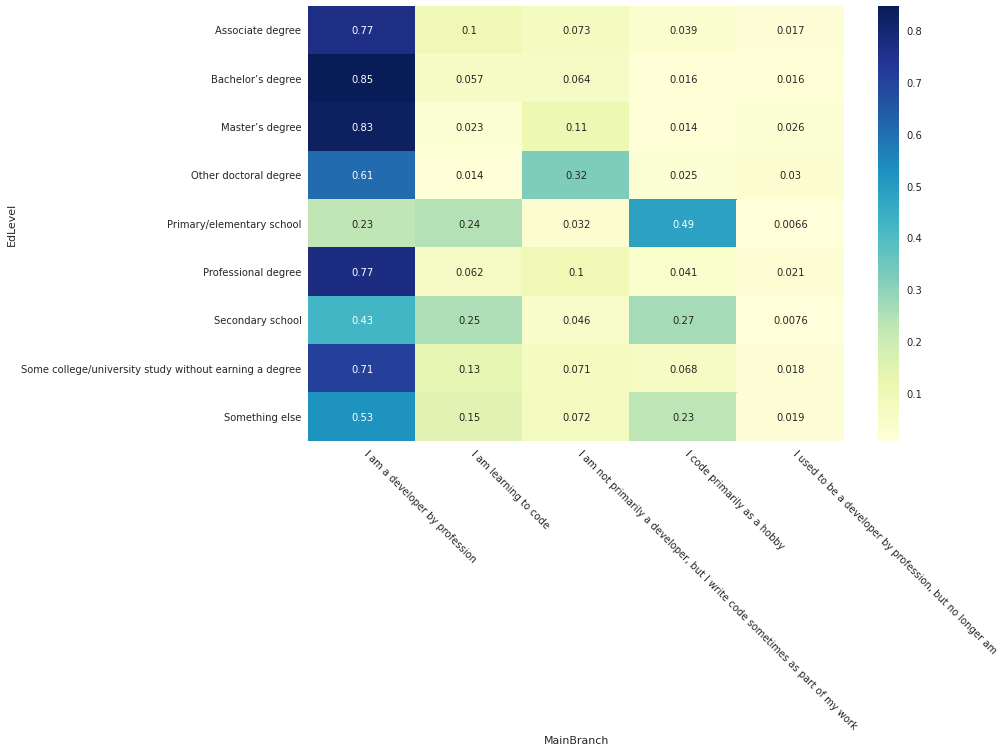

In [17]:
_df = df[['EdLevel', 'MainBranch']].dropna(axis=0)
_df['EdLevel'] = _df['EdLevel'].map(lambda x: x.split(' (')[0])
contigency_pct = pd.crosstab(_df['EdLevel'], _df['MainBranch'], normalize='index')
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")
plt.xticks(rotation=-45, ha='left')

In [18]:
df[['CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use']]

,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL)
2,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows
3,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows
4,NaN,NaN,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,Cloud Firestore;Elasticsearch;Microsoft SQL Se...,Cloud Firestore;Elasticsearch;Firebase Realtim...,Firebase;Microsoft Azure,Firebase;Microsoft Azure,Angular;ASP.NET;ASP.NET Core ;jQuery;Node.js,Angular;ASP.NET Core ;Blazor;Node.js,.NET,.NET;Apache Kafka,npm,Docker;Kubernetes,Notepad++;Visual Studio;Visual Studio Code;Xcode,Rider;Visual Studio;Visual Studio Code,Windows,macOS;Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,60000.0,Yearly,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Elasticsearch;MySQL;PostgreSQL;Redis,MySQL;PostgreSQL;Redis,AWS;DigitalOcean;Google Cloud,AWS;DigitalOcean;Google Cloud,Express;FastAPI;Node.js,Express;FastAPI;Node.js,Flutter,NaN,Docker;Homebrew;Kubernetes;npm,Docker;Homebrew;Kubernetes;npm,IPython/Jupyter;Sublime Text;Vim;Visual Studio...,Sublime Text;Vim;Visual Studio Code,macOS,Linux-based;macOS
73264,107000.0,Yearly,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Elasticsearch;MongoDB;Oracle;SQLite,Elasticsearch;Neo4j;SQLite,NaN,NaN,FastAPI;Flask;React.js,FastAPI;React.js,Keras;NumPy;Pandas;Scikit-learn;TensorFlow;Tor...,NumPy;Pandas;Torch/PyTorch;Hugging Face Transf...,NaN,NaN,IPython/Jupyter;Notepad++;Spyder;Vim;Visual St...,Notepad++;Spyder;Vim;Visual Studio Code,Linux-based;Windows,Linux-based;Windows
73265,NaN,NaN,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,Managed Hosting;Microsoft Azure;VMware,Firebase;Linode;Managed Hosting;Microsoft Azur...,ASP.NET;React.js,ASP.NET;ASP.NET Core ;Blazor;Laravel;Next.js;R...,.NET;Pandas;React Native,.NET;Cordova;Ionic;Pandas;React Native;Xamarin,npm,npm;Unreal Engine,Spyder;Visual Studio;Visual Studio Code,Spyder;Visual Studio;Visual Studio Code,Windows,Windows
73266,58500.0,Yearly,C#;Delphi;VBA,Delphi,Microsoft SQL Server;MongoDB;Oracle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"RAD Studio (Delphi, C++ Builder);Visual Studio","RAD Studio (Delphi, C++ Builder);Visual Studio",Windows,Windows


## Technology in 2022
- We're using the group of 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith' and 'PlatformHaveWorkedWith'.
- We count the number for each value in 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith' and 'PlatformHaveWorkedWith' using the function <code>get_value_counts_distinct'</code>.
- Then we plot the value counts.

<BarContainer object of 42 artists>

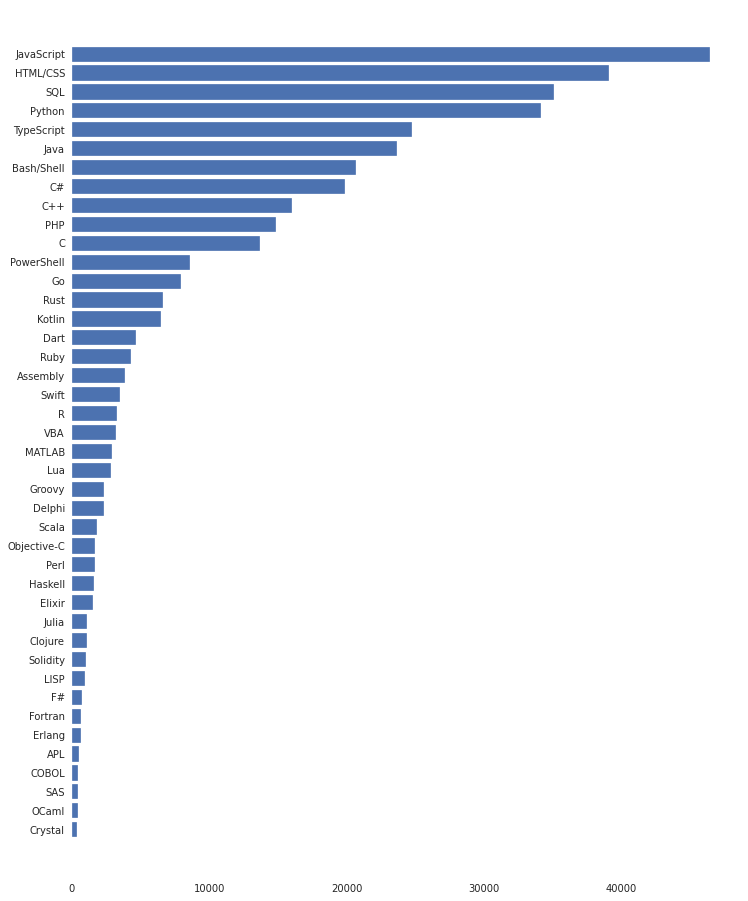

In [22]:
LanguageHaveWorkedWith = df.LanguageHaveWorkedWith.dropna(axis=0)
LanguageHaveWorkedWith_value_counts = get_value_counts_distinct(LanguageHaveWorkedWith).sort_values(axis=0, by='count', ascending=True)
plt.figure(figsize=(12,16))
plt.barh(LanguageHaveWorkedWith_value_counts.iloc[:,0], width=LanguageHaveWorkedWith_value_counts.iloc[:,1])

<BarContainer object of 42 artists>

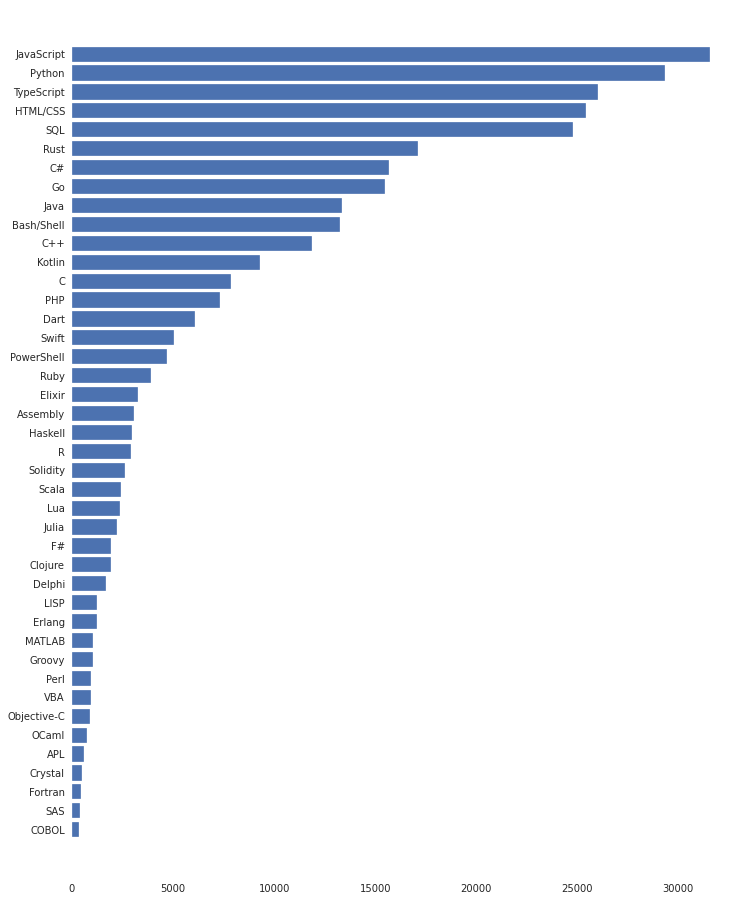

In [23]:
LanguageWantToWorkWith = df.LanguageWantToWorkWith.dropna(axis=0)
LanguageWantToWorkWith_value_counts = get_value_counts_distinct(LanguageWantToWorkWith).sort_values(axis=0, by='count', ascending=True)
plt.figure(figsize=(12,16))
plt.barh(LanguageWantToWorkWith_value_counts.iloc[:,0], width=LanguageWantToWorkWith_value_counts.iloc[:,1])

<BarContainer object of 14 artists>

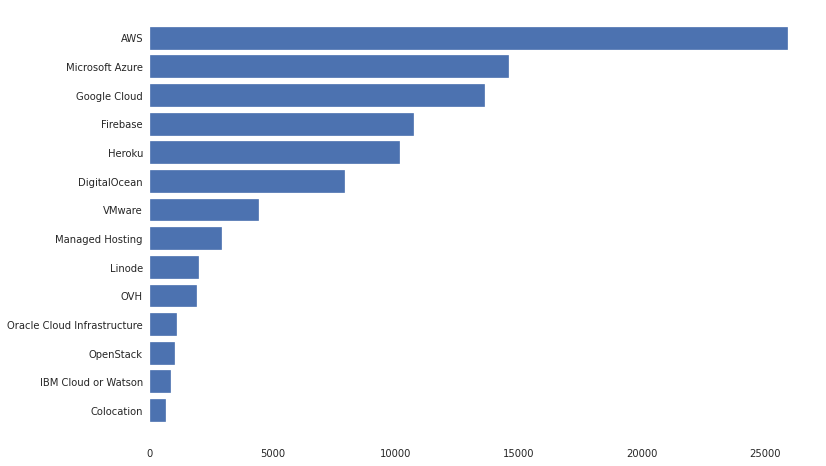

In [25]:
PlatformHaveWorkedWith = df.PlatformHaveWorkedWith.dropna(axis=0)
PlatformHaveWorkedWith_value_counts = get_value_counts_distinct(PlatformHaveWorkedWith).sort_values(axis=0, by='count', ascending=True)
plt.figure(figsize=(12,8))
plt.barh(PlatformHaveWorkedWith_value_counts.iloc[:,0], width=PlatformHaveWorkedWith_value_counts.iloc[:,1])